# Purpose of Project: 

Sarcasm is something we use in face-to-face conversations to make light of a situation or joke around with friends. We know something/someone is sarcastic from their facial expressions, tone of voice, and perhaps the way they phrase their sentiments. However, this is dificult to detect over text or other forms of media since there is only the physical text we have. Because of this, people mistakenly misunderstand one another which leads to uneccesary conflicts. 

By creating this NLP project, I hope to identify a effective way to determine sarcastic comments by identifying what words are common in sarcastic comments. I will first run a portion of the dataset to train my model to learn words common in sarcastic comments then run a new batch of the sarcastic comments dataset to see if my theory holds true. </br>

**7/15** </br>
Improved accuracy of Random Forest from 59% to 61% after hyperparameter tuning of Random Forest
</br>

**7/16** </br>
Improved training accuracy of Random Forest from 61 to ~62% after hyperparameter tuning of TF IDF parameters
</br>

# Traning Dataset



# Analyze Data

Used condensed dataset to save time and better focus on model hyperparameter tuning.

In [1]:
# training data
import pandas as pd
import numpy as np

# pd.options.display.max_columns
# pd.set_option("display.max_colwidth",-1)

# df_train = pd.read_csv("train.csv")
# df_train

In [2]:
# #get subsample
# import pandas as pd
# import numpy as np

# # Get 1000 random samples without replacement
# df_train = df_train.sample(n=1000, random_state=42)  # Set random_state for reproducibility

# df_train


In [3]:
# Save the sample to a new CSV file
# df_train.to_csv("train_sample.csv", index=False)
print("train_sample.csv is saved. This is randomized subsample of full dataset.")

train_sample.csv is saved. This is randomized subsample of full dataset.


In [4]:
title = "train_sample.csv"
df_train = pd.read_csv(title)
df_train

,Y,text
0,1,podcaster makes solemn promise to improve soun...
1,1,tsa agent can bring himself to make dad take o...
2,1,law schools now require applicants to honestly...
3,1,r stine reveals slappy from night of the livin...
4,0,psychic helps sniff out missing pet skunk
...,...,...
995,1,bank of america introduces new 50 underdraft fee
996,1,man just going to assume this counts as minced
997,1,report more americans willing to accept female...
998,1,lemur fantasizes about ripping face off next d...


In [5]:
# Identify any na values
count_na = df_train.isnull().sum()
count_na

Y       0
text    0
dtype: int64

In [6]:
#get number of points

df_train.shape

(1000, 2)

Results below show near 50:50 data split, so fair classification training set for our model

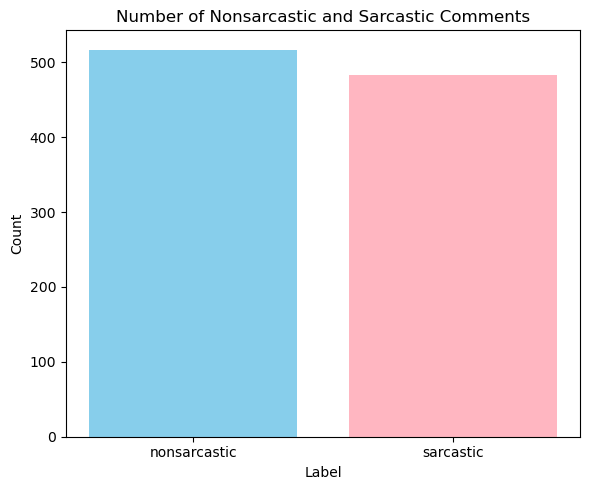

In [7]:
#distribution of sarcasm/non-sarcasm
import matplotlib.pyplot as plt

# Assuming the first column contains the labels (good or bad)
labels = df_train.iloc[:, 0]

# Count the number of SARCASTIC/NONSARCASTIC
nonsarcastic = (labels == 0).sum()
sarcastic = (labels == 1).sum()

# Create a list for categories
categories = ["nonsarcastic", "sarcastic"]

# Create a list for counts
counts = [nonsarcastic, sarcastic]

# Create the bar chart
plt.figure(figsize=(6, 5)) 
plt.bar(categories, counts, color=['skyblue', 'lightpink'])  
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Nonsarcastic and Sarcastic Comments")
plt.xticks(rotation=0)  
plt.tight_layout()


plt.show()

In [8]:
# preprocess
#text feature engineer
# one method? or ensemble?

## Preprocessing

1) Tokenization

chunk words in sentences into seperate entities.

In [9]:
import os
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()

2) Stemming

Stemming - get root word (running -> run)

Lemmentizing - root work from various forms of word (ran -> run , running -> run)

Removing stop words

In [10]:
# finds important words in dataset tweets and stores them into array
# drops stop words

corpus = []
import re

#goes up to length of dataset
for i in range(len(df_train["text"])):
    train_text = re.sub('[^a-zA-Z]',' ',df_train["text"][i])
    train_text = train_text.lower()
    train_text = train_text.split()
    clean_review = [ps.stem(word) for word in train_text if not word in set(stopwords.words('english'))]
    clean_review = ' '.join(clean_review)
    corpus.append(clean_review)
    


In [11]:
# view cleaned text first and second row
corpus[0]


'podcast make solemn promis improv sound qualiti next episod'

In [12]:
corpus[1]

'tsa agent bring make dad take comfi shoe'

3) Text Feature Extraction

This step includes converting the comments themselves to numerical data. I used TF-IDF (Term Frequency-Inverse Document Frequency), which gives a value to each word in a text from 0 to 1 to determine its importance. Other feature extraction methods can be used [here](https://medium.com/@eskandar.sahel/exploring-feature-extraction-techniques-for-natural-language-processing-46052ee6514)

Why I used TF-IDF: it determines importance of word in my collection of texts based on its frequency in both the singular text and collection of texts. This also accounts for all words by assigning them a value ranging from 0 - 1 instead of prioritizing top x words.</br>

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


In [13]:
# #method 1 - from my COVID_Tweet_NLP project

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=2000, min_df=2, max_df = .6) #means "ignore terms that appear in less than 2 messages". use integer or decimal (percentage)?
# #max_features = how many words we want to collect
# #max_df = gets rid of words occuring in x% of documents

# X = vectorizer.fit_transform(corpus).toarray() #comments to number

# X

This will serve as my control since no parameters were define in the TfidVectorizer. I will compare the accuracy with another TfidVectorizer with established parameters 

In [14]:
# #method 2 - from eskandar.sahel

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vec = TfidfVectorizer() #control hyperparameter tunings
X_tfidf = tfidf_vec.fit_transform(corpus)
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:10])
print(X_tfidf.toarray()[0][:10])

X = tfidf_vec.fit_transform(corpus).toarray()

TF-IDF:
['ab' 'abandon' 'abba' 'abomin' 'abort' 'abram' 'absenc' 'absolut' 'abu'
 'academ']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
y = df_train.iloc[ : , 0].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

## Running Preprocessed Data - Random Forrest (RF)

Why use RF: It makes multiple trees that model out the many different paths it can take to classify input material. The classification that the most number of decision treees lead to is the final classification that the model predicts.
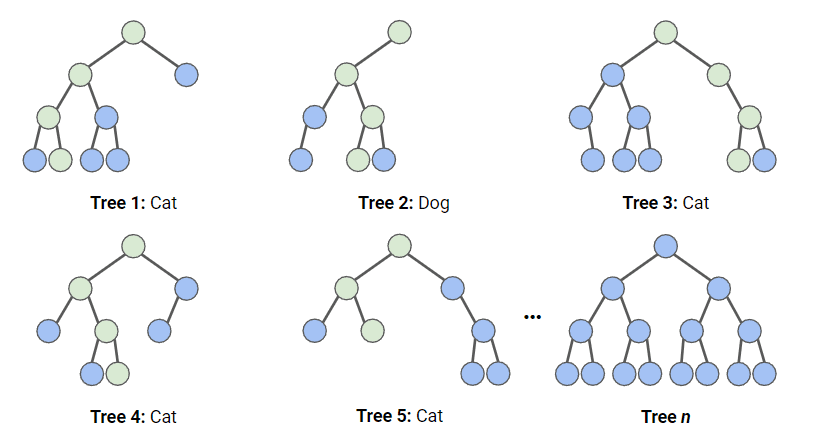

Credit: Datacamp

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# cross validation score
labels = df_train.Y
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
]

#n_estimators = number of trees made before making a decision 

cross_value_scored = []
for model in models:
    model_name = model.__class__.__name__
    accuracies= cross_val_score(model, X, labels, scoring = 'accuracy', cv = 5)
    for accuracy in accuracies:
        cross_value_scored.append((model_name, accuracy))

In [18]:
# make a dataframe of cross_val_scor
df_cv = pd.DataFrame(cross_value_scored, columns =['model_name', 'accuracy'])
acc = pd.concat([df_cv.groupby('model_name').accuracy.mean(),df_cv.groupby('model_name').accuracy.std()], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
RandomForestClassifier,0.598,0.035107


--------------

# Changing Parameters in TfidfVectorizer

max_df: removes words that appear too frequently - term that appears in less than x% of documents is kept

min_df: removes words that appear too infrequently - term that appears in at least x documents is kept

max_features: The most number of features a model will consider 

Parameters changed: tfidf_vec = TfidfVectorizer(min_df=20,max_df = .8)</br>

**7/16**</br>

I used L2 because I wanted to analyze the relative importance of certain words in texts. But I will test with L1 and L2.</br>

I also used ngram_range=(1,2) so model accounts for words alone and words in pairs to determine with ones ar eimportant parts in a text



In [42]:
#updated parameters

# #method 2 - from eskandar.sahel

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vec = TfidfVectorizer(min_df=20,
                            max_df = .8,
                           norm='l2',
                            ngram_range=(1,2),
                            max_features = 5000
                           ) #control hyperparameter tunings
X_tfidf = tfidf_vec.fit_transform(corpus)
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:10])
print(X_tfidf.toarray()[0][:10])

X = tfidf_vec.fit_transform(corpus).toarray()

TF-IDF:
['american' 'get' 'like' 'make' 'man' 'nation' 'new' 'peopl' 'report'
 'say']
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Best Parameters in Random Forrest

**Use hyperparameter grid or random search to find best values for chosen parameters**</br>

I will decide between the two methods for determining the best hyperparameters for the randomforrestclassifier based on the accuracy output. I will also tweak some of the values in the predefined space before cross validation.</br>

Grid search:</br>
* Runs every parameter combinations to determine best ones
* Takes up too much time and computationally expensive

Random search:</br>
* Runs random parameter combinations to determine best ones
* More efficient

-------

**Notes about parameters**

Bootstrapping: getting a random sample from data with replacement.

max_features: considers number of features at each split in tree

**Why max_features and min_samples_leaf?**

Speed: Considering fewer features at each split can speed up the model training process.

Preventing overfitting: Reducing the number of features can help prevent the model from becoming too complex and overfitting the training data.

Improving generalization: By introducing randomness, max_features can help the model generalize better to unseen data.

[Will Koehrsen- Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)</br>

https://stackoverflow.com/questions/64089009/how-can-i-tune-the-parameters-in-a-random-forest-classifier-inside-a-pipeline</br>

[Natassha Selvaraj- 
Hyperparameter Tuning Using Grid Search and Random Search in Python](https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html)

From documentation:<br /> 

**Verbose:**<br /> 
verbose=0: Silent mode - no output during training.<br /> 
verbose=1: Progress bar mode - displays a progress bar with training and validation metrics (default).<br /> 
verbose=2: One line per epoch - shows a summary of training and validation metrics after each epoch.<br /> 

**n_jobs**<br /> 
set to -1 to activate parallel processing, speeds up process <br /> 

**criterion**<br /> 

gini: provides probability model will misclassify some item in a set<br /> 
entropy: measures amount of randomness in a set, computationally expensive<br /> 

In [43]:
#grid search

rf = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[100,150,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3],
            'criterion':['gini','entropy'],
           }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
model_grid = grid.fit(X,y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


In [44]:
#output best parameters

print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 200}
Best score is: 0.6249902597207986


In [45]:
#Random search

from scipy.stats import randint

rs_space={'max_depth':list(np.arange(3, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(1, 10, step=1)
         }

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)
model_random = rf_random.fit(X,y)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [46]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 210}
Best score is: 0.6219872567177956


## Run RandomForrestClassifier with Best Parameters

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# cross validation score
labels = df_train.Y
models = [
    RandomForestClassifier(criterion= 'gini', 
                           max_depth= 3, 
                           max_features= 3, 
                           min_samples_leaf= 3, 
                           min_samples_split= 2, 
                           n_estimators= 150),
]

#n_estimators = number of trees made before making a decision 

cross_value_scored = []
for model in models:
    model_name = model.__class__.__name__
    accuracies= cross_val_score(model, X, labels, scoring = 'accuracy', cv = 5)
    for accuracy in accuracies:
        cross_value_scored.append((model_name, accuracy))
        
# make a dataframe of cross_val_scor
df_cv = pd.DataFrame(cross_value_scored, columns =['model_name', 'accuracy'])
acc = pd.concat([df_cv.groupby('model_name').accuracy.mean(),df_cv.groupby('model_name').accuracy.std()], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
RandomForestClassifier,0.616,0.018507


## Train Test Split 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with your desired parameters
clf = RandomForestClassifier(criterion= 'gini', 
                            max_depth= 5, 
                            max_features= 5, 
                            min_samples_leaf= 5, 
                            min_samples_split= 2, 
                            n_estimators= 1000)

# Fit the model on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=5,
                       n_estimators=1000)

In [50]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.61


In [51]:
#classification report:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.55      0.95      0.70        96
           1       0.86      0.30      0.44       104

    accuracy                           0.61       200
   macro avg       0.71      0.62      0.57       200
weighted avg       0.71      0.61      0.57       200

